In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

<function matplotlib.pyplot.show(close=None, block=None)>

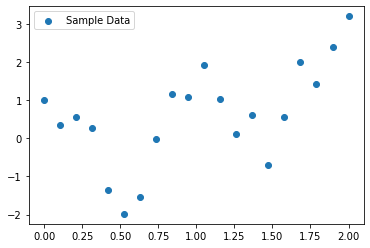

In [59]:
# (b)
# read data from the modified cvs file
df_data = pd.read_csv("fitting_N20.csv")
x = df_data["x"]
t = df_data["t"]
plt.scatter(x,t, label="Sample Data")
plt.legend()
plt.show

In [60]:
# (c)
#PolynomialFeatures() function in Scikit-learn library, 
# drives a new feature sets from the original feature set. 
#That is, a matrix will be generated consisting of all polynomial combinations 
# of the features with degree less than or equal to the specified degree. 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [61]:
# Train/Test Split involves splitting the dataset into training and testing sets respectively, 
# which are mutually exclusive. 
msk = np.random.rand(len(df_data)) < 0.8
train = df_data[msk]
test = df_data[~msk]

train_x = np.asanyarray(train[['x']])
train_t = np.asanyarray(train[['t']])

test_x = np.asanyarray(test[['x']])
test_t = np.asanyarray(test[['t']])

In [91]:
# fit_transform takes our x values, and output a list of our data raised from power of 0 to power of M 
# (since we set the degree of our polynomial to M).

poly = PolynomialFeatures(degree = 3)
train_x_poly = poly.fit_transform(train_x)

# so we can use LinearRegression() function to solve it:
fit = linear_model.LinearRegression()
train_t_ = fit.fit(train_x_poly, train_t)

# The coefficients
print ('Coefficients: ', fit.coef_)
print ('Intercept: ',fit.intercept_)

Coefficients:  [[ 0.         -4.08155335  3.64392542 -0.56136517]]
Intercept:  [0.75091326]


Text(0.5, 1.0, 'M = 3')

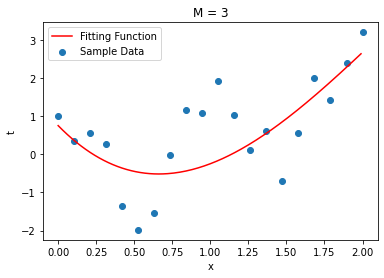

In [92]:
xx = np.arange(0.0, 2, 0.01)
tt = fit.intercept_[0] + fit.coef_[0][1]*xx + fit.coef_[0][2]*np.power(xx, 2) + fit.coef_[0][3]*np.power(xx, 3) 
#+ fit.coef_[0][4]*np.power(xx, 4) + fit.coef_[0][5]*np.power(xx, 5) + fit.coef_[0][6]*np.power(xx, 6)
# + fit.coef_[0][7]*np.power(xx, 7) + fit.coef_[0][8]*np.power(xx, 8)
# + fit.coef_[0][9]*np.power(xx, 9) + fit.coef_[0][10]*np.power(xx, 10)
plt.plot(xx, tt, '-r', label="Fitting Function")
plt.scatter(x,t, label="Sample Data")
plt.xlabel("x")
plt.ylabel("t")
plt.legend()
plt.title('M = 3')